<a href="https://colab.research.google.com/github/Faabry/Pandas-Repository/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de diabetes**
* Uma empresa precisa fazer um levantamento sobre quantas pessoas tem mais de 50 anos e dentre essas pessoas quantas tem o BMI abaixo de 30 ("Normal) e quantas pessoas tem o BMI acima de 30("Obeso").

## **Task 1:** Importar a base de dados.

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Task 2:** Verificar o tipo primitivo de cada coluna.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.shape

# Nosso DataFrame original possui 
# 768n linhas
# 9 colunas

(768, 9)

## **Task 3:** Filtrar as colunas onde os pacientes tem mais de 50 anos.

In [4]:
maior_que_cinquenta = df.loc[df["Age"] > 50]
maior_que_cinquenta.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


In [5]:
maior_que_cinquenta.shape

# Nosso DataFrame com pessoas acima de 50 anos tem:
# 81 Linhas
# 9 Colunas

(81, 9)

## **Task 4:** Criar uma nova coluna com a informação se aquele paciente esta com o BMI **Normal** ou **Obeso**.

In [6]:
status = []

In [7]:
for row in maior_que_cinquenta["BMI"]:
  if row < 30:
    status.append("Normal")
  else:
    status.append("Obeso")

In [8]:
len(status)

81

In [9]:
maior_que_cinquenta["Status"] = status

<ipython-input-9-1c1421a8fdab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maior_que_cinquenta["Status"] = status


In [10]:
maior_que_cinquenta.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Status
8,2,197,70,45,543,30.5,0.158,53,1,Obeso
9,8,125,96,0,0,0.0,0.232,54,1,Normal
12,10,139,80,0,0,27.1,1.441,57,0,Normal
13,1,189,60,23,846,30.1,0.398,59,1,Obeso
14,5,166,72,19,175,25.8,0.587,51,1,Normal


In [11]:
x = maior_que_cinquenta.loc[maior_que_cinquenta["Status"] == "Normal"].count()
y = maior_que_cinquenta.loc[maior_que_cinquenta["Status"] == "Obeso"].count()

In [12]:
a = [x["Status"], y["Status"]]
a

[38, 43]

In [13]:
labels = ["Normal", "Obeso"]

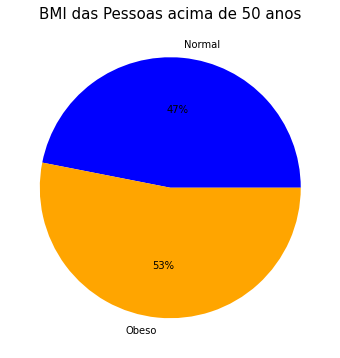

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("BMI das Pessoas acima de 50 anos", size=(15))
plt.pie(a, labels=labels, autopct="%0.0f%%", colors=("blue", "orange"))
plt.show()

# **Conclusão:**
* 47% das pessoas acima de 50 anos tem o BMI abaixo de 30 sendo classificadas como "Normal".
* 53% das pessoas acima de 50 anos tem o BMI acima de 30 sendo classificadas como "Obeso".